## 作业2：ADAMS和RK4数值积分的实现
仿照run_euler函数的实现，在modsim中实现Adams和四阶Runge-Kutta法，并使用炮弹发射仿真比较Euler、Adams和RK4三种数值积分的精度。实现run_adams和run_rk4函数。

In [20]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## 定义Adams函数

In [21]:
def run_adams(system, slope_func, **options):
    
    # the default message if nothing changes
    msg = "The solver successfully reached the end of the integration interval."

    # get parameters from system
    init, t_0, t_end, dt = check_system(system, slope_func)

    # make the TimeFrame
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    y1 = frame.row[t_0]
    slopes = slope_func(y1, t_0, system)
    y2 = [y + slope * dt for y, slope in zip(y1, slopes)]
    t2 = t_0 + dt
    frame.row[t2] = y2
    ts = linrange(t_0, t_end, dt) * get_units(t_end)

    # run the solver
    for t1 in ts:
        y1 = frame.row[t1]
        slopes = slope_func(y1, t1, system)
        t2 = t1 + dt
        y2 = frame.row[t2]
        slopes1 = slope_func(y2, t2, system)
        y3 = [y + 0.5 * dt * (3 * slope1 - slope) for y, slope, slope1 in zip(y2, slopes, slopes1)]
        a = y3[0]
        if a<0 :
            break
        else:
            t3 = t2 + dt
            frame.row[t3] = y3

    details = ModSimSeries(dict(message="Success"))
    return frame, details

### 用admas法仿真炮弹发射

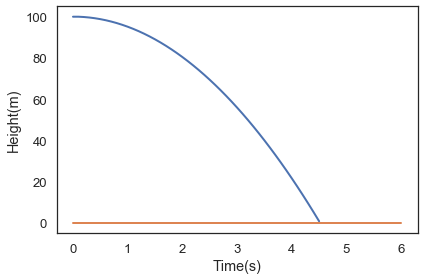

In [22]:
m = UNITS.meter
s = UNITS.second

g = 9.8 * m/s**2

init_z = State(y=100.0 * m, v=0.0 * m/s)
init_x = State(y=0.0 * m, v=500.0 * m/s)

t_end = 6 * s
dt = 0.1 * s

system_z = System(init=init_z, g=g, t_end=t_end, dt=dt)
system_x = System(init=init_x, t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 * m/s**2
    
    return dydt, dvdt

results_z, details_z = run_adams(system_z, slope_func_z)
results_x, details_x = run_adams(system_x, slope_func_x)
plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)

In [23]:
result = results_z

,y,v
0.0,100.0 meter,0.0 meter / second
0.1,100.0 meter,-0.9800000000000001 meter / second
0.2,99.853 meter,-1.9600000000000002 meter / second
0.3,99.60799999999999 meter,-2.9400000000000004 meter / second
0.4,99.26499999999999 meter,-3.9200000000000004 meter / second
0.5,98.82399999999998 meter,-4.9 meter / second
0.6,98.28499999999998 meter,-5.880000000000001 meter / second
0.7,97.64799999999998 meter,-6.860000000000001 meter / second
0.8,96.91299999999998 meter,-7.840000000000002 meter / second
0.9,96.07999999999998 meter,-8.820000000000002 meter / second


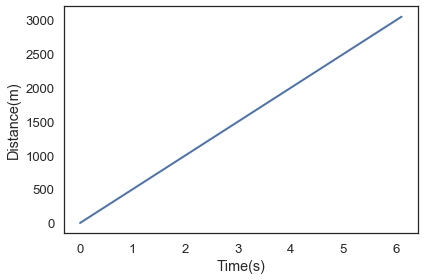

In [24]:
plot(results_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

## 定义rk4函数

In [25]:
def run_rk4(system, slope_func, **options):
    init, t_0, t_end, dt = check_system(system, slope_func)
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt) * get_units(t_end)
    for t1 in ts:
        y1 = frame.row[t1]
        k1s = slope_func(y1, t1, system)
        y11 = [y + 0.5 * dt * k1 for y, k1 in zip(y1, k1s)]
        k2s = slope_func(y11 , t1 + 0.5 * dt, system)
        y12 = [y + 0.5 * dt * k2 for y, k2 in zip(y1, k2s)]
        k3s = slope_func(y12, t1 + 0.5 * dt, system)
        y13 = [y + dt * k3 for y, k3 in zip(y1, k3s)]
        k4s = slope_func(y13, t1 + dt, system)
        y2 = [y + dt * (k1 + 2 * k2 + 2 * k3 + k4)/6 for y, k1, k2, k3, k4 in zip(y1, k1s, k2s, k3s, k4s)]
        if a<0 :
            break
        else:
            t2 = t1 + dt
            frame.row[t2] =  y2
    return frame

### 用rk4法仿真炮弹发射

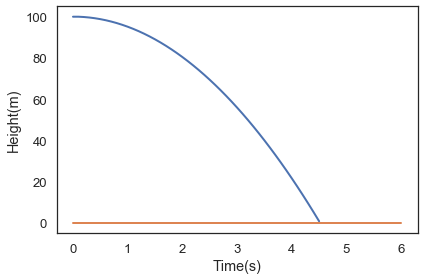

In [26]:
results_z1, details_z1 = run_adams(system_z, slope_func_z)
results_x1, details_x1 = run_adams(system_x, slope_func_x)
plot(results_z1.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)

In [27]:
result1 = results_z1

,y,v
0.0,100.0 meter,0.0 meter / second
0.1,100.0 meter,-0.9800000000000001 meter / second
0.2,99.853 meter,-1.9600000000000002 meter / second
0.3,99.60799999999999 meter,-2.9400000000000004 meter / second
0.4,99.26499999999999 meter,-3.9200000000000004 meter / second
0.5,98.82399999999998 meter,-4.9 meter / second
0.6,98.28499999999998 meter,-5.880000000000001 meter / second
0.7,97.64799999999998 meter,-6.860000000000001 meter / second
0.8,96.91299999999998 meter,-7.840000000000002 meter / second
0.9,96.07999999999998 meter,-8.820000000000002 meter / second


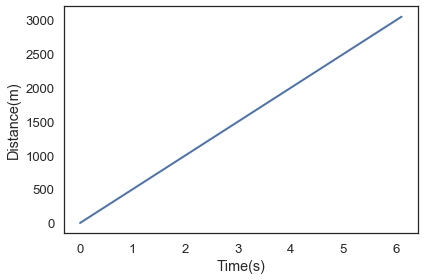

In [28]:
plot(results_x1.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')